In [175]:
import pandas as pd

In [176]:
import torch
def display_vram_stats():
    left, total = torch.cuda.mem_get_info()
    print(f"Used space - {total/1024/1024/1024 - left/1024/1024/1024}GB/{total/1024/1024/1024}GB")

In [177]:
display_vram_stats()

Used space - 4.0478515625GB/23.64752197265625GB


In [178]:
import os

In [179]:
DATA_DIR = '/workspace/knowledge-base-chat-bot-develop/data/kzsk'

DOCUMENTS_DATA_DIR = os.path.join(DATA_DIR, 'documents')
QUESTIONS_DATA_DIR = os.path.join(DATA_DIR, 'questions')
IMAGES_DATA_DIR = os.path.join(DATA_DIR, 'images')

PAGES_DATA_DIR = os.path.join(IMAGES_DATA_DIR, 'pages')

DOCUMENTS_NAMES = os.listdir(DOCUMENTS_DATA_DIR)
PAGES_NAMES = os.listdir(PAGES_DATA_DIR)

In [180]:
os.listdir(DOCUMENTS_DATA_DIR)

['RU2748330C2_20210524.pdf',
 'Гидросилилирование обзор.pdf',
 'Ю.Д. Семчиков - Высокомолекулярные соединения,.pdf',
 'получение полиметилгидридметилсилоксана.pdf',
 'фторсилоксаны.pdf',
 '.ipynb_checkpoints']

In [181]:
documents = []

- Dolphin
- Abbyy
- pytesseract
- pymupdf
- docling
- boa(https://github.com/ndlrf-rnd/progress-boa/tree/main)
- pdfminer.six(https://github.com/pdfminer/pdfminer.six)
- marker(https://github.com/datalab-to/marker)

# Docling

In [182]:
import json
import logging
import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
    TesseractCliOcrOptions
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [183]:
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [184]:
# VRAM 420 MB for ibm-granite/granite-vision-3.1-2b-preview

pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.do_formula_enrichment=False
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = False

pipeline_options.table_structure_options.do_cell_matching = True

#pipeline_options.ocr_options = TesseractCliOcrOptions()
pipeline_options.ocr_options.lang = ["ru", "en"]  
#pipeline_options.ocr_options.path = '/usr/bin/tesseract'
#pipeline_options.ocr_options.force_full_page_ocr = False


pipeline_options.accelerator_options = AcceleratorOptions(
    num_threads=10, device=AcceleratorDevice.CUDA
)

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

In [185]:
input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[4])
print(input_doc_path)

/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/фторсилоксаны.pdf


In [186]:
%%time

start_time = time.time()
conv_result = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time

print(f"Document converted in {end_time:.2f} seconds.")
# VRAM - 1040 MB - 1 page

Document converted in 10.09 seconds.
CPU times: user 8.78 s, sys: 119 ms, total: 8.9 s
Wall time: 10.1 s


In [122]:
doc_converter.convert(input_doc_path, page_range=(5, 5))

ConversionError: Input document фторсилоксаны.pdf is not valid.

In [119]:
blocks

'Каучук и резина. 2010. № 1\n30\nИнгредиенты\nве основы 100 % высокомолекулярного каучука \nВМФСК.\nИсследование стойкости вулканизатов к действию \nтрансформаторного масла ГК показало, что введение \nпробки не ухудшает маслостойкость материалов, полу-\nченных на основе низкомолекулярных каучуков ФСК. \nВ то же время набухание композиций на основе высо-\nкомолекулярного каучука ВМФСК и измельченной \nпробки практически на порядок больше (до 4 % (мас.)) \nпо сравнению с композициями на основе этого же кау-\nчука, но не содержащими пробки (см. табл.1). Более \nвысокая степень набухания композиции с измельчен-\nной пробкой на основе ВМФСК по сравнению с ФСК, \nпо-видимому, связана с плохим смачиванием поверх-\nности пробки высокомолекулярным каучуком, а коли-\nчество масла, поглощенного композицией, зависит от \nсорбирующей способности пробки.\nНа относительное удлинение при разрыве иссле-\nдованных композиций не оказывает влияния ни \nсодержание пробки, ни содержание ВМФСК.\nТаким образо

In [158]:
a: os.PathLike = None

TypeError: 'ABCMeta' object does not support item assignment

In [165]:
class ch:
    def __init__(self, num):
        self.num = num
    def change(self):
        self.num = 100000

In [166]:
a = [ch(3), ch(5)]

In [169]:
a[0].num

3

In [172]:
a[0].change()

In [173]:
a[0].num

100000

In [157]:
type(a)

int

In [156]:
a = 1

In [152]:
type(a)

int

In [121]:
conv_result.document.export_to_markdown()

'Таблица 2. Влияние содержания пробки на физико-механические свойства  композиций  на  основе  фторсилоксановых  каучуков\n\nВМФСК и ФСК-6\n\n| ВМФСК:ФСК-6 (мас.)   |   С пр , мас.ч. | f p ,МПа   |   ε р ,% | θ ,% (мас.)   |\n|----------------------|-----------------|------------|----------|---------------|\n| 25 : 75              |              35 | 1,0        |       40 | 3,2           |\n| 25 : 75              |              45 | 1,2        |       40 | 3,2           |\n| 25 : 75              |              60 | 1,0        |       40 | 2,8           |\n| 100 : 0              |              60 | 1,7        |       40 | 4,0           |\n\nПримечание. С пр - содержание пробки. См. также примечание к табл. 1.\n\n## ве  основы  100  %  высокомолекулярного  каучука ВМФСК.\n\nИсследование стойкости вулканизатов к действию трансформаторного масла ГК показало, что введение пробки не ухудшает маслостойкость материалов, полученных на основе низкомолекулярных каучуков ФСК. В то же время набухан

In [103]:
start_time = time.time()
for i in range(1, 5):
    conv_result = doc_converter.convert(input_doc_path, page_range=(i, i))
end_time = time.time() - start_time

print(f"Document converted in {end_time:.2f} seconds.")


Document converted in 6.04 seconds.


In [ ]:
conv_result.document.pages

In [199]:
conv_result.document.pages[0].image.uri

KeyError: 0

In [187]:
# Save page images
for page_no, page in conv_result.document.pages.items():
    page_no = page.page_no
    print(page_no)
    page_image_filename = os.path.join(PAGES_DATA_DIR, f'{DOCUMENTS_NAMES[1][:-4]}_{page_no}.png')
    page.image.pil_image.save(page_image_filename, format="PNG")
    print(page_image_filename)

1
/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_1.png
2
/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_2.png
3
/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_3.png
4
/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_4.png


In [99]:
conv_result.document.pages[1].cells()

AttributeError: 'PageItem' object has no attribute 'cells'

In [25]:
import pandas as pd

In [101]:
len(conv_result.document.tables)

2

In [102]:
table_df

""


In [103]:
conv_result.document.tables

[TableItem(self_ref='#/tables/0', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TABLE: 'table'>, prov=[ProvenanceItem(page_no=5, bbox=BoundingBox(l=41.750484466552734, t=533.9809265136719, r=361.89593505859375, b=447.3867492675781, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))], captions=[], references=[], footnotes=[], image=None, data=TableData(table_cells=[TableCell(bbox=BoundingBox(l=45.0, t=310.3333333333333, r=76.66666666666666, b=323.0, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), row_span=1, col_span=1, start_row_offset_idx=0, end_row_offset_idx=1, start_col_offset_idx=0, end_col_offset_idx=1, text='Sample', column_header=True, row_header=False, row_section=False), TableCell(bbox=BoundingBox(l=149.66666666666669, t=311.6666666666667, r=159.66666666666669, b=319.6666666666667, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), row_span=1, col_span=1, start_row_offset_idx=0, end_row_offset_idx=1

In [202]:
# Export tables
    for table_ix, table in enumerate(conv_result.document.tables):
    #print(table)
    #table.add_annotation('123')
    print(table.to_markdown())
    #table_df: pd.DataFrame = table.export_to_dataframe()
    #print(f"## Table {table_ix}")
    #print(table_df.to_markdown())
    #print(table_df)

AttributeError: 'TableItem' object has no attribute 'to_markdown'


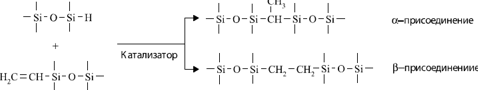
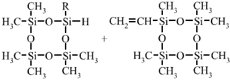
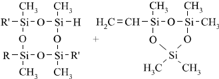
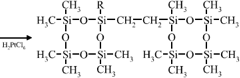
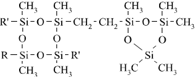
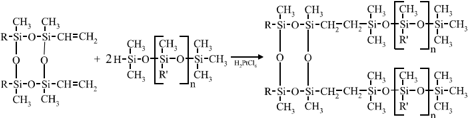
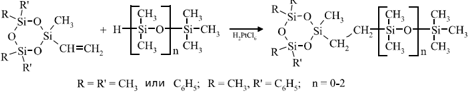
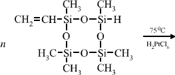
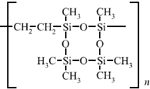
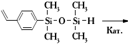
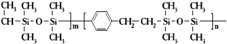
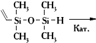
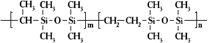
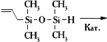
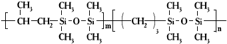
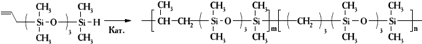
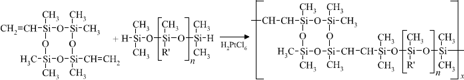
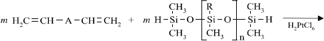
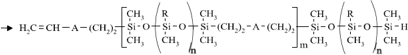
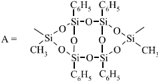
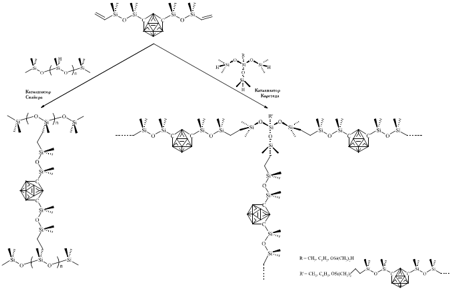
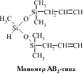
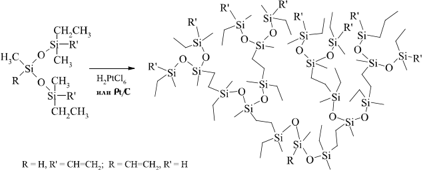
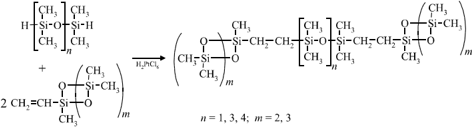
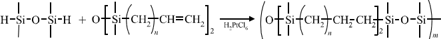
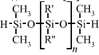
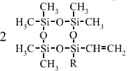
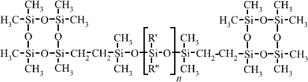
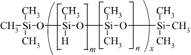
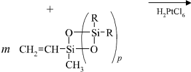
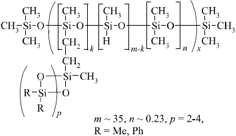
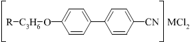
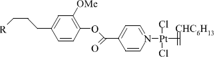
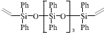
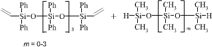
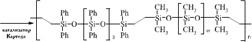
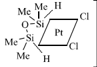
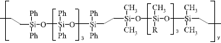
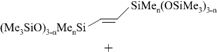
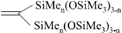
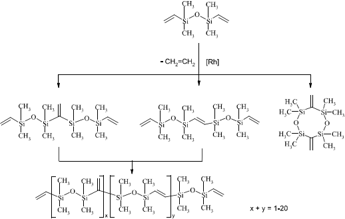
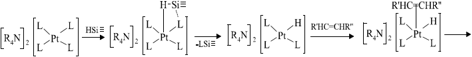
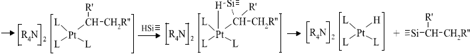
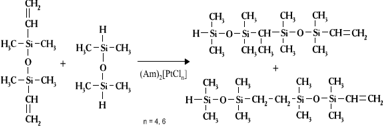
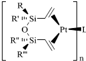
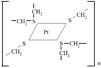
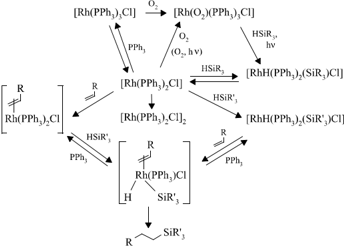
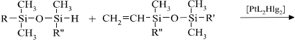
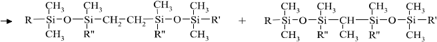
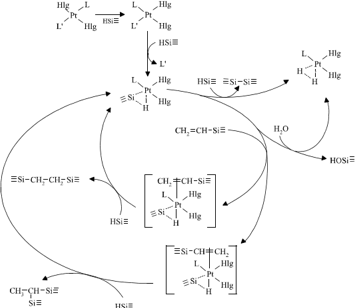
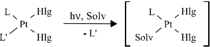
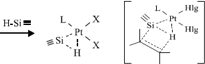

In [122]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in conv_result.document.pictures:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{pic.image.uri!s}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=conv_result.document)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

# PaddleOCR

In [129]:
# Initialize PaddleOCR instance
from importlib import reload
import paddleocr
paddleocr = reload(paddleocr)

In [1]:
from paddleocr import PaddleOCR

In [22]:
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    lang='ru')

# Run OCR inference on a sample image 
result = ocr.predict(
    input="/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_2.png")

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating model: ('eslav_PP-OCRv5_mobile_rec', None)
Using official model (eslav_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Connecting to https://paddle-model-ecology.bj.bcebos.com/paddlex/official_inference_model/paddle3.0.0/eslav_PP-OCRv5_mobile_rec_infer.tar ...
[==================================================] 100.00%
Extracting eslav_PP-OCRv5_mobile_rec_infer.tar
[==================================================] 100.00%
{'res': {'input_path': '/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_2.png', 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings'

In [34]:
import os
import cv2
from paddleocr import PPStructureV3

table_engine = PPStructureV3()

save_folder = './output'
img_path = "/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/Гидросилилирование обзор_2.png"
img = cv2.imread(img_path)
result = table_engine(img)
save_structure_res(result, save_folder,os.path.basename(img_path).split('.')[0])

for line in result:
    line.pop('img')
    print(line)

from PIL import Image

font_path = 'doc/fonts/simfang.ttf' # font provieded in PaddleOCR
image = Image.open(img_path).convert('RGB')
im_show = draw_structure_result(image, result,font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating model: ('PP-DocBlockLayout', None)
Using official model (PP-DocBlockLayout), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating model: ('PP-DocLayout_plus-L', None)
Using official model (PP-DocLayout_plus-L), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
Creating mode

TypeError: 'PPStructureV3' object is not callable

# PyMUPDF

In [42]:
import pymupdf

In [110]:
input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[4])
print(input_doc_path)

/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/фторсилоксаны.pdf


In [133]:
doc[0]

page 0 of /workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/фторсилоксаны.pdf

In [136]:
page = doc[0]
text = page.get_text()

In [138]:
' '.join(doc[0].get_text('text').split('\n'))

'27 Каучук и резина. 2010. № 1 Наполнители агентов, что  препятствует образованию   достаточно  густой и прочной вулканизационной сетки и, как  следствие, снижаются прочностные характеристики. Поскольку введение ТШП в резиновые смеси  оказывает пластифицирующее действие, для получе- ния более жестких эластомерных композиций необ- ходимо меньшее содержание пластификаторов по  сравнению со смесями с техуглеродом [3].  Из-за  наличия присущих шунгиту  антиокисли- тельных свойств можно было ожидать улучшения  показателей вулканизатов после старения. Однако,  как видно из полученных результатов, весь комплекс  свойств после старения ухудшается. По-видимому,  это также связано с формированием недостаточно  прочной вулканизационной сетки при использова- нии шунгита.   Таким образом, показана  возможность исполь- зования шунгита в производстве неформовых рези- нотехнических изделий. Присутствие в шунгите  наноразмерных частиц фуллеренов улучшает тех- нологические свойства (уменьшение вязкости 

In [139]:
' '.join(doc[1].get_text('text').split('\n'))

'Каучук и резина. 2010. № 1 28 Наполнители мической стабильности их вулканизатов LSR приме- няют при производстве изделий для ухода за детьми, в  медицинской и пищевой промышленности, для раз- личных автомобильных деталей, компонентов элек- тронных проборов, а также для пропитки различных  тканей (армированные РТИ, мембраны и т.п.) [1, 2]. Наиболее широкое применение нашли двухком- понентные LSR-композиции, вулканизующиеся по  реакции гидросилилирования [3–8]. Основу таких  композиций составляют полидиметилсилоксановые  каучуки с невысокой молекулярной массой, имею- щие на концах цепи или у атомов кремния в сере- дине цепи ненасыщенные (обычно винильные)  группы. Отверждение композиций осуществляется  в результате взаимодействия функциональных групп  молекул каучука с полифункциональными олиго- мерными метилгидридсилоксанами в присутствии  катализатора. Варьирование числа и расположения функцио- нальных групп в молекуле каучука, его молекуляр- ной массы, концентрации каучука в композиц

In [111]:
doc = pymupdf.open(input_doc_path)  # or pymupdf.Document(filename)


In [71]:
' '.join(doc[1].get_text('text').split('\n'))

'Гидросилилирование 1-винил-1,3,3,5,5,7,7-гептаме- тилциклотетрасилоксана  гидросилоксанами  общей формулы  H(СH3)nSi[OSi(CH3)3]3-n (n = 0-2) предложено осуществлять ампульным методом при 20, 50 и 900С в присутствии  катализатора  Спайера  [25].  Активность гидросилоксанов,  определенная  по  относительным константам скорости конкурирующих реакций, оказа- лась тем выше, чем меньше количество пространствен- но-объемных триметилсилоксигрупп находится у атома кремния, связанного с водородом. То есть, по мнению авторов,  активность  определяется  главным  образом стерическими факторами, а не наличием у атома крем- ния заместителей с –I-эффектом, облегчающих диссо- циацию  связи  Si-H.  Анализ  методом  ГЖХ  продуктов присоединения показал, что наряду с основными веще- ствами образуются  и побочные, количество которых увеличивается с ростом температуры реакции и сниже- нием активности гидросилоксана, которая уменьшает- ся в ряду [25]: H(СH3)2SiOSi(CH3)3 > H(СH3)Si[OSi(CH3)3]2 >>  > HSi[OSi(

In [113]:
for page in doc[3]:
    blocks = page.get_text('text')
    break

TypeError: 'Page' object is not iterable

In [116]:
blocks = doc[3].get_text('text')


In [117]:
blocks

'Каучук и резина. 2010. № 1\n30\nИнгредиенты\nве основы 100 % высокомолекулярного каучука \nВМФСК.\nИсследование стойкости вулканизатов к действию \nтрансформаторного масла ГК показало, что введение \nпробки не ухудшает маслостойкость материалов, полу-\nченных на основе низкомолекулярных каучуков ФСК. \nВ то же время набухание композиций на основе высо-\nкомолекулярного каучука ВМФСК и измельченной \nпробки практически на порядок больше (до 4 % (мас.)) \nпо сравнению с композициями на основе этого же кау-\nчука, но не содержащими пробки (см. табл.1). Более \nвысокая степень набухания композиции с измельчен-\nной пробкой на основе ВМФСК по сравнению с ФСК, \nпо-видимому, связана с плохим смачиванием поверх-\nности пробки высокомолекулярным каучуком, а коли-\nчество масла, поглощенного композицией, зависит от \nсорбирующей способности пробки.\nНа относительное удлинение при разрыве иссле-\nдованных композиций не оказывает влияния ни \nсодержание пробки, ни содержание ВМФСК.\nТаким образо

In [68]:
page = doc[1]

In [59]:
blocks

[(56.74861145019531,
  36.8865966796875,
  290.7256774902344,
  225.9042205810547,
  'Гидросилилирование 1-винил-1,3,3,5,5,7,7-гептаме-\nтилциклотетрасилоксана  гидросилоксанами  общей\nформулы  H(СH3)nSi[OSi(CH3)3]3-n (n = 0-2) предложено\nосуществлять ампульным методом при 20, 50 и 900С в\nприсутствии  катализатора  Спайера  [25].  Активность\nгидросилоксанов,  определенная  по  относительным\nконстантам скорости конкурирующих реакций, оказа-\nлась тем выше, чем меньше количество пространствен-\nно-объемных триметилсилоксигрупп находится у атома\nкремния, связанного с водородом. То есть, по мнению\nавторов,  активность  определяется  главным  образом\nстерическими факторами, а не наличием у атома крем-\nния заместителей с –I-эффектом, облегчающих диссо-\nциацию  связи  Si-H.  Анализ  методом  ГЖХ  продуктов\nприсоединения показал, что наряду с основными веще-\nствами образуются  и побочные, количество которых\nувеличивается с ростом температуры реакции и сниже-\nнием активности гидро

In [62]:
for line in page.get_text("html").splitlines():
    print(line)

<div id="page0" style="width:595.3pt;height:841.9pt">
<p style="top:36.8pt;left:70.9pt;line-height:9.0pt"><span style="font-family:TT4D81o00,serif;font-size:9.0pt;color:#000000">&#x413;&#x438;&#x434;&#x440;&#x43e;&#x441;&#x438;&#x43b;&#x438;&#x43b;&#x438;&#x440;&#x43e;&#x432;&#x430;&#x43d;&#x438;&#x435; 1-&#x432;&#x438;&#x43d;&#x438;&#x43b;-1,3,3,5,5,7,7-&#x433;&#x435;&#x43f;&#x442;&#x430;&#x43c;&#x435;-</span></p>
<p style="top:46.8pt;left:56.7pt;line-height:9.0pt"><span style="font-family:TT4D81o00,serif;font-size:9.0pt;color:#000000">&#x442;&#x438;&#x43b;&#x446;&#x438;&#x43a;&#x43b;&#x43e;&#x442;&#x435;&#x442;&#x440;&#x430;&#x441;&#x438;&#x43b;&#x43e;&#x43a;&#x441;&#x430;&#x43d;&#x430;  &#x433;&#x438;&#x434;&#x440;&#x43e;&#x441;&#x438;&#x43b;&#x43e;&#x43a;&#x441;&#x430;&#x43d;&#x430;&#x43c;&#x438;  &#x43e;&#x431;&#x449;&#x435;&#x439;</span></p>
<p style="top:56.8pt;left:56.7pt;line-height:9.0pt"><span style="font-family:TT4D81o00,serif;font-size:9.0pt;color:#000000">&#x444;&#x43e;&#

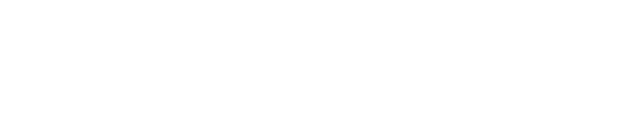

In [66]:
import base64
import io
from PIL import Image

# Example base64 encoded image string (replace with your actual base64 string)
# This is a very short example and won't represent a full image.
# Real base64 image strings are much longer.
base64_image_string = """iVBORw0KGgoAAAANSUhEUgAAAnEAAAB/CAIAAAAPegM2AAAACXBIWXMAAA7EAAAOxAGVKw4bAAACCElEQVR4nO3VQQkAMAzAwPo3vZoIDMqdgvwyDwAozO8AADjCUwGg4akA0PBUAGh4KgA0PBUAGp4KAA1PBYCGpwJAw1MBoOGpANDwVABoeCoANDwVABqeCgANTwWAhqcCQMNTAaDhqQDQ8FQAaHgqADQ8FQAangoADU8FgIanAkDDUwGg4akA0PBUAGh4KgA0PBUAGp4KAA1PBYCGpwJAw1MBoOGpANDwVABoeCoANDwVABqeCgANTwWAhqcCQMNTAaDhqQDQ8FQAaHgqADQ8FQAangoADU8FgIanAkDDUwGg4akA0PBUAGh4KgA0PBUAGp4KAA1PBYCGpwJAw1MBoOGpANDwVABoeCoANDwVABqeCgANTwWAhqcCQMNTAaDhqQDQ8FQAaHgqADQ8FQAangoADU8FgIanAkDDUwGg4akA0PBUAGh4KgA0PBUAGp4KAA1PBYCGpwJAw1MBoOGpANDwVABoeCoANDwVABqeCgANTwWAhqcCQMNTAaDhqQDQ8FQAaHgqADQ8FQAangoADU8FgIanAkDDUwGg4akA0PBUAGh4KgA0PBUAGp4KAA1PBYCGpwJAw1MBoOGpANDwVABoeCoANDwVABqeCgANTwWAhqcCQMNTAaDhqQDQ8FQAaHgqADQ8FQAangoADU8FgIanAkDDUwGg4akA0PBUAGh4KgA0PBUAGgs2qsEWIxnu9wAAAABJRU5ErkJggg=="""

try:
    # Decode the base64 string
    decoded_image_data = base64.b64decode(base64_image_string)

    # Create a BytesIO object to treat the decoded data as a file
    image_stream = io.BytesIO(decoded_image_data)

    # Open the image using Pillow
    img = Image.open(image_stream)

    # Display the image
    img.show()

except Exception as e:
    print(f"Error displaying image: {e}")